In [ ]:
#!pip install pystan
#!conda install -c conda-forge fbprophet
#pip install --upgrade jupyter

In [1]:
import pandas as pd
from fbprophet import Prophet
import matplotlib.pyplot as plt


#import os
#os.chdir('drive/My Drive')

#import os
#import altair as alt

#file_path = 'Prophet model ts data.csv'
data = pd.read_csv('Prophet TS data.csv')




In [2]:
data.head()

,ds,y
0,12-10-2007,9.590761
1,12-11-2007,8.519590
2,12-12-2007,8.183677
3,12/13/2007,8.072467
4,12/14/2007,7.893572


In [3]:
data['ds'] = pd.to_datetime(data['ds'])
data.head()

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572


In [4]:
def fit_predict_model(dataframe, interval_width = 0.99, changepoint_range  = 0.8):
    m = Prophet(daily_seasonality = False, yearly_seasonality = False, weekly_seasonality = False,
                seasonality_mode = 'multiplicative', 
                interval_width = interval_width,
                changepoint_range  = changepoint_range )
    m = m.fit(dataframe)
    
    forecast = m.predict(dataframe)
    forecast['fact'] = dataframe['y'].reset_index(drop = True)
    print('Displaying Prophet plot')
    fig1 = m.plot(forecast)
    return forecast
    


Displaying Prophet plot


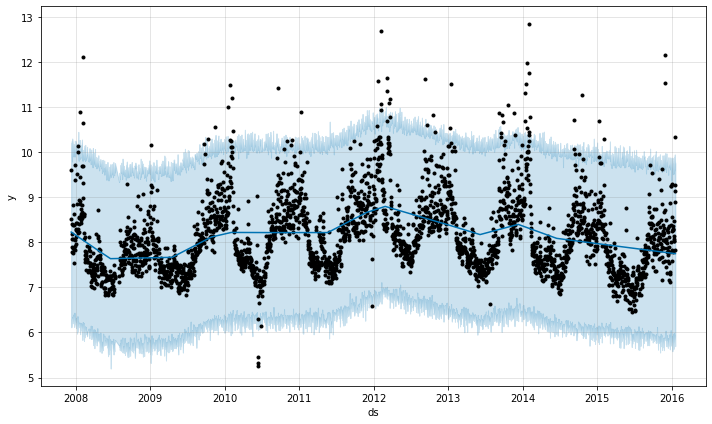

In [5]:
pred = fit_predict_model(data)

In [6]:
def detect_anomalies(forecast):
    forecasted = forecast[['ds','trend', 'yhat', 'yhat_lower', 'yhat_upper', 'fact']].copy()
    #forecast['fact'] = df['y']

    forecasted['anomaly'] = 0
    forecasted.loc[forecasted['fact'] > forecasted['yhat_upper'], 'anomaly'] = 1
    forecasted.loc[forecasted['fact'] < forecasted['yhat_lower'], 'anomaly'] = -1

    #anomaly importances
    forecasted['importance'] = 0
    forecasted.loc[forecasted['anomaly'] ==1, 'importance'] = \
        (forecasted['fact'] - forecasted['yhat_upper'])/forecast['fact']
    forecasted.loc[forecasted['anomaly'] ==-1, 'importance'] = \
        (forecasted['yhat_lower'] - forecasted['fact'])/forecast['fact']
    
    return forecasted


In [7]:
pred = detect_anomalies(pred)
pred.head()

,ds,trend,yhat,yhat_lower,yhat_upper,fact,anomaly,importance
0,2007-12-10,8.225444,8.225444,6.288898,10.204115,9.590761,0,0.0
1,2007-12-11,8.222341,8.222341,6.113556,10.064712,8.519590,0,0.0
2,2007-12-12,8.219238,8.219238,6.150353,9.885010,8.183677,0,0.0
3,2007-12-13,8.216135,8.216135,6.280796,10.245793,8.072467,0,0.0
4,2007-12-14,8.213032,8.213032,6.323968,9.789455,7.893572,0,0.0


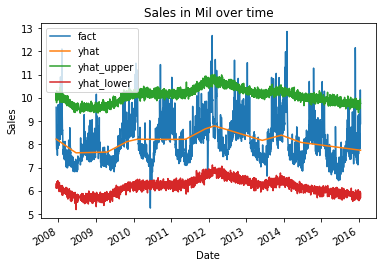

In [8]:
pd.plotting.register_matplotlib_converters()  # needed to plot timestamps
pred.plot(x='ds', y=['fact', 'yhat', 'yhat_upper', 'yhat_lower'])
plt.title('Sales in Mil over time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

In [9]:

anomaly_data = pred[pred['anomaly'] == 1]
anomaly_data

,ds,trend,yhat,yhat_lower,yhat_upper,fact,anomaly,importance
42,2008-01-21,8.095114,8.095114,6.181383,10.267100,10.897202,1,0.057822
55,2008-02-04,8.051671,8.051671,6.045632,9.927309,12.097457,1,0.179389
56,2008-02-05,8.048568,8.048568,6.230435,10.048577,10.635278,1,0.055166
362,2009-01-04,7.653726,7.653726,5.711704,9.374265,10.153818,1,0.076774
623,2009-09-22,8.034241,8.034241,6.229267,9.973713,10.179982,1,0.020262
...,...,...,...,...,...,...,...,...
2533,2015-01-12,7.963909,7.963909,6.145283,9.976677,10.694986,1,0.067163
2554,2015-02-02,7.951669,7.951669,5.963774,9.688396,10.283225,1,0.057845
2853,2015-11-30,7.776231,7.776231,5.866579,9.614987,12.149672,1,0.208622
2854,2015-12-01,7.775649,7.775649,5.834081,9.974803,11.523044,1,0.134360
